<a href="https://colab.research.google.com/github/ShreyasRavikumar/lane-detection/blob/main/lane_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


def roi(image, vertices):
    mask = np.zeros_like(image)
    mask_color = 255
    cv2.fillPoly(mask, vertices, mask_color)
    cropped_img = cv2.bitwise_and(image, mask)
    return cropped_img


def draw_lines(image, hough_lines):
    for line in hough_lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    return image


# img = cv2.imread("saved_frame.jpg")
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


def process(img):
    height = img.shape[0]
    width = img.shape[1]
    roi_vertices = [
        (0, 650),
        (2*width/3, 2*height/3),
        (width, 1000)
    ]

    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_img = cv2.dilate(gray_img, kernel=np.ones((3, 3), np.uint8))

    canny = cv2.Canny(gray_img, 130, 220)

    roi_img = roi(canny, np.array([roi_vertices], np.int32))

    lines = cv2.HoughLinesP(roi_img, 1, np.pi / 180, threshold=10, minLineLength=15, maxLineGap=2)

    final_img = draw_lines(img, lines)

    return final_img


cap = cv2.VideoCapture("lane_vid2.mp4")

frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*"XVID")
saved_frame = cv2.VideoWriter("lane_detection.avi", fourcc, 30.0, (frame_width, frame_height))

while cap.isOpened():
    ret, frame = cap.read()

    try:
        frame = process(frame)

        saved_frame.write(frame)
        cv2.imshow("frame", frame)

        if cv2.waitKey(1) & 0xFF == 27:
            break

    except Exception:
        break

cap.release()
saved_frame.release()
cv2.destroyAllWindows()

plt.show()

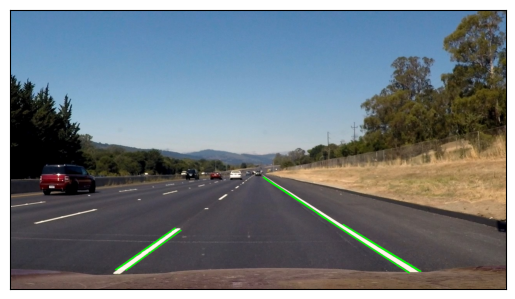

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1) Load image
img = cv2.imread("test_img.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Step 2) Gray Scale
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray_img = cv2.dilate(gray_img, kernel=np.ones((5, 5), np.uint8))

# Step 3) Canny
canny = cv2.Canny(gray_img, 100, 200)

# Step 4) Define ROI Vertices
roi_vertices = [(270, 670), (600, 400), (1127, 712)]

# Step 5) Define ROI function
def roi(image, vertices):
    mask = np.zeros_like(image)
    mask_color = 255
    cv2.fillPoly(mask, vertices, mask_color)
    masked_img = cv2.bitwise_and(image, mask)
    return masked_img

# Step 6) ROI Image
roi_image = roi(canny, np.array([roi_vertices], np.int32))

# Step 7) Apply Hough Lines P Method on ROI Image
lines = cv2.HoughLinesP(roi_image, 1, np.pi / 180, 100, minLineLength=100, maxLineGap=10)

# Step 8) Draw Hough lines
def draw_lines(image, hough_lines):
    for line in hough_lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    return image

final_img = draw_lines(img.copy(), lines)  # Copy the original image to preserve it

# Display the result
plt.imshow(final_img)
plt.xticks([])
plt.yticks([])
plt.show()
